In [1]:
import json
import requests
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#https://developer.riotgames.com/

api_key = 'RGAPI-478421e7-d04b-4776-a1cf-5469c378c4ee'
summoner_name = 'dTian'
my_region = 'na1'
champ_code = 10
ranked_solo_code = 420

In [3]:
# url = 'https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/Doublelift?api_key={}'.format(api_key)

In [4]:
# pip install riotwatcher

In [5]:
from riotwatcher import LolWatcher, ApiError

watcher = LolWatcher(api_key)

me = watcher.summoner.by_name(my_region, summoner_name)
print(me)

# all objects are returned (by default) as a dict
# lets see if i got diamond yet (i probably didnt)
my_ranked_stats = watcher.league.by_summoner(my_region, me['id'])
print(my_ranked_stats)

# First we get the latest version of the game from data dragon
versions = watcher.data_dragon.versions_for_region(my_region)
champions_version = versions['n']['champion']

# Lets get some champions
# current_champ_list = lol_watcher.data_dragon.champions(champions_version)
# print(current_champ_list)

# For Riot's API, the 404 status code indicates that the requested data wasn't found and
# should be expected to occur in normal operation, as in the case of a an
# invalid summoner name, match ID, etc.
#
# The 429 status code indicates that the user has sent too many requests
# in a given amount of time ("rate limiting").

try:
    response = watcher.summoner.by_name(my_region, summoner_name)
except ApiError as err:
    if err.response.status_code == 429:
        print('We should retry in {} seconds.'.format(err.response.headers['Retry-After']))
        print('this retry-after is handled by default by the RiotWatcher library')
        print('future requests wait until the retry-after time passes')
    elif err.response.status_code == 404:
        print('Summoner with that ridiculous name not found.')
    else:
        raise

{'id': 'd3lAVQL64CPQCtcih5hwaiYJMQF8ImzlfaKZt3sQdNUC9B8', 'accountId': 'eNXPtKlyIp51UDb8eD8EihXDXMY1hz0r4Rtyqd55zVjnze0', 'puuid': 'XzQgfcczP2tDhKQ4kuWAnDHdAGwLTYF-zK3kck_kfBVZxp6r_tQnpOeHQGfo0d7w5qT5KFGe3eRwSw', 'name': 'dTian', 'profileIconId': 21, 'revisionDate': 1621026980000, 'summonerLevel': 268}
[{'leagueId': 'cba5ae6f-8601-44f4-9e3b-a3cf62af9347', 'queueType': 'RANKED_FLEX_SR', 'tier': 'PLATINUM', 'rank': 'II', 'summonerId': 'd3lAVQL64CPQCtcih5hwaiYJMQF8ImzlfaKZt3sQdNUC9B8', 'summonerName': 'dTian', 'leaguePoints': 44, 'wins': 46, 'losses': 47, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}, {'leagueId': '871049b2-f23c-4b71-a4fc-428612580494', 'queueType': 'RANKED_SOLO_5x5', 'tier': 'DIAMOND', 'rank': 'I', 'summonerId': 'd3lAVQL64CPQCtcih5hwaiYJMQF8ImzlfaKZt3sQdNUC9B8', 'summonerName': 'dTian', 'leaguePoints': 29, 'wins': 552, 'losses': 522, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}]


In [6]:
my_matches = watcher.match.matchlist_by_account(my_region, me['accountId'])

# fetch last match detail
last_match = my_matches['matches'][0]
match_detail = watcher.match.by_id(my_region, last_match['gameId'])

participants = []
for row in match_detail['participants']:
    participants_row = {}
    participants_row['champion'] = row['championId']
    participants_row['spell1'] = row['spell1Id']
    participants_row['spell2'] = row['spell2Id']
    participants_row['win'] = row['stats']['win']
    participants_row['kills'] = row['stats']['kills']
    participants_row['deaths'] = row['stats']['deaths']
    participants_row['assists'] = row['stats']['assists']
    participants_row['totalDamageDealtToChampions'] = row['stats']['totalDamageDealtToChampions']
    participants_row['goldEarned'] = row['stats']['goldEarned']
    participants_row['champLevel'] = row['stats']['champLevel']
    participants_row['totalMinionsKilled'] = row['stats']['totalMinionsKilled']
    participants_row['longestTimeSpentLiving'] = row['stats']['longestTimeSpentLiving']
    participants_row['champLevel'] = row['stats']['champLevel']
    participants_row['visionWardsBoughtInGame'] = row['stats']['visionWardsBoughtInGame']
    participants_row['firstBloodKill'] = row['stats']['firstBloodKill']
    participants_row['firstBloodAssist'] = row['stats']['firstBloodAssist']
    participants_row['damageTakenPerMinDeltas'] = row['timeline']['damageTakenPerMinDeltas']
#     participants_row['creepsPerMinDeltas 0-10'] = row['timeline']['creepsPerMinDeltas']['0-10']
#     participants_row['creepsPerMinDeltas 10-20'] = row['timeline']['creepsPerMinDeltas']['10-20']
#     participants_row['creepsPerMinDeltas 20-30'] = row['timeline']['creepsPerMinDeltas']['20-30']
    participants.append(participants_row)
df = pd.DataFrame(participants)
df

,champion,spell1,spell2,win,kills,deaths,assists,totalDamageDealtToChampions,goldEarned,champLevel,totalMinionsKilled,longestTimeSpentLiving,visionWardsBoughtInGame,firstBloodKill,firstBloodAssist,damageTakenPerMinDeltas
0,111,4,14,True,4,3,9,6101,7059,11,38,512,4,True,False,"{'10-20': 587.7, '0-10': 369.70000000000005}"
1,103,12,4,True,7,2,9,12656,9970,13,135,414,0,False,False,"{'10-20': 732, '0-10': 375}"
2,9,11,4,True,4,0,7,9446,9071,13,37,0,4,False,False,"{'10-20': 523.7, '0-10': 773.3}"
3,62,12,4,True,9,2,3,16521,9864,14,151,706,2,False,False,"{'10-20': 1316.4, '0-10': 469.5}"
4,145,7,4,True,6,4,6,11210,10035,12,160,209,2,False,False,"{'10-20': 648.3, '0-10': 462.59999999999997}"
5,102,11,4,False,6,6,0,12427,8795,12,44,330,4,False,False,"{'10-20': 1297.9, '0-10': 754.2}"
6,68,4,14,False,1,6,1,8994,6404,12,132,349,1,False,False,"{'10-20': 700, '0-10': 382.4}"
7,43,4,14,False,1,7,6,7775,5946,10,30,267,5,False,False,"{'10-20': 574.7, '0-10': 455.8}"
8,10,4,12,False,1,6,1,11918,6719,13,149,386,2,False,False,"{'10-20': 753.0999999999999, '0-10': 378.9}"
9,67,4,7,False,2,5,3,6264,6557,10,120,460,1,False,False,"{'10-20': 474.8, '0-10': 357}"


In [7]:
match_detail

{'gameId': 3910358275,
 'platformId': 'NA1',
 'gameCreation': 1621277258148,
 'gameDuration': 1310,
 'queueId': 420,
 'mapId': 11,
 'seasonId': 13,
 'gameVersion': '11.10.374.9538',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Win',
   'firstBlood': True,
   'firstTower': True,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': True,
   'towerKills': 5,
   'inhibitorKills': 0,
   'baronKills': 0,
   'dragonKills': 2,
   'vilemawKills': 0,
   'riftHeraldKills': 2,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 20, 'pickTurn': 1},
    {'championId': 157, 'pickTurn': 2},
    {'championId': 77, 'pickTurn': 3},
    {'championId': 25, 'pickTurn': 4},
    {'championId': 412, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Fail',
   'firstBlood': False,
   'firstTower': False,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': False,
   'firstRiftHerald': False,
   'towerKil

In [8]:
my_matches_first100 = watcher.match.matchlist_by_account(my_region, me['accountId'], begin_index=0, end_index=100, 
                                                         champion=champ_code, queue=ranked_solo_code)
my_matches_second100 = watcher.match.matchlist_by_account(my_region, me['accountId'], begin_index=100, end_index=200,
                                                          champion=champ_code, queue=ranked_solo_code)
my_matches_third100 = watcher.match.matchlist_by_account(my_region, me['accountId'], begin_index=200, end_index=300, 
                                                         champion=champ_code, queue=ranked_solo_code)
my_matches_fourth100 = watcher.match.matchlist_by_account(my_region, me['accountId'], begin_index=300, end_index=400, 
                                                         champion=champ_code, queue=ranked_solo_code)
my_matches_fifth100 = watcher.match.matchlist_by_account(my_region, me['accountId'], begin_index=400, end_index=500, 
                                                         champion=champ_code, queue=ranked_solo_code)

total_game_ids = []
for match in my_matches_first100['matches']:
    total_game_ids.append(match['gameId'])
for match in my_matches_second100['matches']:
    total_game_ids.append(match['gameId'])
for match in my_matches_third100['matches']:
    total_game_ids.append(match['gameId'])
for match in my_matches_fourth100['matches']:
    total_game_ids.append(match['gameId'])
for match in my_matches_fifth100['matches']:
    total_game_ids.append(match['gameId'])

len(total_game_ids)

500

In [9]:
match_detail

{'gameId': 3910358275,
 'platformId': 'NA1',
 'gameCreation': 1621277258148,
 'gameDuration': 1310,
 'queueId': 420,
 'mapId': 11,
 'seasonId': 13,
 'gameVersion': '11.10.374.9538',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Win',
   'firstBlood': True,
   'firstTower': True,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': True,
   'towerKills': 5,
   'inhibitorKills': 0,
   'baronKills': 0,
   'dragonKills': 2,
   'vilemawKills': 0,
   'riftHeraldKills': 2,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 20, 'pickTurn': 1},
    {'championId': 157, 'pickTurn': 2},
    {'championId': 77, 'pickTurn': 3},
    {'championId': 25, 'pickTurn': 4},
    {'championId': 412, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Fail',
   'firstBlood': False,
   'firstTower': False,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': False,
   'firstRiftHerald': False,
   'towerKil

In [10]:
personal_data = []

for game_id in total_game_ids:
    match_detail = watcher.match.by_id(my_region, game_id)
    for row in match_detail['participants']:
        personal_data_row = {}
        allyTeam = []
        enemyTeam = []
        allyChamps = []
        enemyChamps = []
        if row['championId'] == champ_code:
            personal_data_row['champion'] = row['championId']
            personal_data_row['gameDuration'] = match_detail['gameDuration']
            personal_data_row['win'] = row['stats']['win']
            personal_data_row['totalDamageDealtToChampions'] = row['stats']['totalDamageDealtToChampions']
            personal_data_row['goldEarned'] = row['stats']['goldEarned']
            personal_data_row['champLevel'] = row['stats']['champLevel']
            personal_data_row['totalMinionsKilled'] = row['stats']['totalMinionsKilled']
            personal_data_row['longestTimeSpentLiving'] = row['stats']['longestTimeSpentLiving']
            personal_data_row['champLevel'] = row['stats']['champLevel']
            personal_data_row['teamColor'] = row['teamId']
            personal_data_row['visionWardsBoughtInGame'] = row['stats']['visionWardsBoughtInGame']
            try:
                personal_data_row['firstBloodKill'] = row['stats']['firstBloodKill']
            except:
                personal_data_row['firstBloodKill'] = np.nan
            try:
                personal_data_row['firstBloodAssist'] = row['stats']['firstBloodAssist']
            except:
                personal_data_row['firstBloodAssist'] = np.nan
            try:
                personal_data_row['damageTakenPerMinDeltas 0-10'] = row['timeline']['damageTakenPerMinDeltas']['0-10']
            except:
                personal_data_row['damageTakenPerMinDeltas 0-10'] = np.nan
            try:
                personal_data_row['creepsPerMinDeltas 0-10'] = row['timeline']['creepsPerMinDeltas']['0-10']
            except:
                personal_data_row['creepsPerMinDeltas 0-10'] = np.nan
            try:
                personal_data_row['damageTakenPerMinDeltas 10-20'] = row['timeline']['damageTakenPerMinDeltas']['10-20']
            except:
                personal_data_row['damageTakenPerMinDeltas 10-20'] = np.nan
            try:
                personal_data_row['damageTakenPerMinDeltas 20-30'] = row['timeline']['damageTakenPerMinDeltas']['20-30']
            except:
                personal_data_row['damageTakenPerMinDeltas 20-30'] = np.nan
            try:
                personal_data_row['creepsPerMinDeltas 10-20'] = row['timeline']['creepsPerMinDeltas']['10-20']
            except:
                personal_data_row['creepsPerMinDeltas 10-20'] = np.nan
            try:
                personal_data_row['creepsPerMinDeltas 20-30'] = row['timeline']['creepsPerMinDeltas']['20-30']
            except:
                personal_data_row['creepsPerMinDeltas 20-30'] = np.nan
            if row['teamId'] == 100:
                for x in range (0,5):
                    allyTeam.append(match_detail['participantIdentities'][x]['player']['summonerName'])
                    allyChamps.append(match_detail['participants'][x]['championId'])
                    personal_data_row['allyTeam'] = allyTeam
                    personal_data_row['allyChamps'] = allyChamps
                for x in range (5,10):
                    enemyTeam.append(match_detail['participantIdentities'][x]['player']['summonerName'])
                    enemyChamps.append(match_detail['participants'][x]['championId'])
                    personal_data_row['enemyTeam'] = enemyTeam
                    personal_data_row['enemyChamps'] = enemyChamps
            else:
                for x in range (5,10):
                    allyTeam.append(match_detail['participantIdentities'][x]['player']['summonerName'])
                    allyChamps.append(match_detail['participants'][x]['championId'])
                    personal_data_row['allyTeam'] = allyTeam
                    personal_data_row['allyChamps'] = allyChamps
                for x in range (0,5):
                    enemyTeam.append(match_detail['participantIdentities'][x]['player']['summonerName'])
                    enemyChamps.append(match_detail['participants'][x]['championId'])
                    personal_data_row['enemyTeam'] = enemyTeam
                    personal_data_row['enemyChamps'] = enemyChamps

            personal_data.append(personal_data_row)
            
df_personal_data = pd.DataFrame(personal_data)
df_personal_data

,champion,gameDuration,win,totalDamageDealtToChampions,goldEarned,champLevel,totalMinionsKilled,longestTimeSpentLiving,teamColor,visionWardsBoughtInGame,...,damageTakenPerMinDeltas 0-10,creepsPerMinDeltas 0-10,damageTakenPerMinDeltas 10-20,damageTakenPerMinDeltas 20-30,creepsPerMinDeltas 10-20,creepsPerMinDeltas 20-30,allyTeam,allyChamps,enemyTeam,enemyChamps
0,10,1310,False,11918,6719,13,149,386,200,2,...,378.9,7.0,753.1,NaN,7.4,NaN,"[Dare Me, Defstruction, soojin puppy, dTian, T...","[102, 68, 43, 10, 67]","[Kirihime, Addle, fidlekastro, mypphard, TheOn...","[111, 103, 9, 62, 145]"
1,10,1220,False,7379,6742,13,173,535,200,1,...,405.5,7.6,1013.1,NaN,9.7,NaN,"[0ne 2 3, generating, INLFTRGMH, dTian, atmost]","[77, 18, 40, 10, 39]","[InsaneJinx, mute all be safe, BELLAKO, Kind Y...","[360, 777, 62, 35, 875]"
2,10,1168,False,4582,5783,11,119,354,200,2,...,390.5,6.7,NaN,NaN,NaN,NaN,"[LeoEmperor IV, Remmacss, boatsman adrift, wis...","[39, 523, 76, 497, 10]","[GianLTC, hashinshin, EREN JAÉGER, RebelGangg,...","[53, 266, 84, 245, 429]"
3,10,1767,False,10487,12658,15,178,636,100,2,...,488.6,5.9,433.2,NaN,6.4,NaN,"[Riot Williams, Kwonz0, ButtahFinger, dTian, L...","[516, 222, 201, 10, 30]","[Geranimo, Nami is a man, 1st Keklel, madbrizk...","[18, 235, 254, 24, 517]"
4,10,1446,False,13138,8604,14,173,432,200,2,...,355.5,5.8,798.1,NaN,8.6,NaN,"[Geranimo, Succulent Burger, dTian, MágicStick...","[235, 121, 10, 69, 64]","[it takes time, DurandalNA, generating, Challe...","[12, 245, 18, 107, 62]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10,1994,True,25960,14632,18,182,613,200,3,...,407.6,6.0,535.3,1090.5,7.2,3.5,"[Sibon, IntAcc17, bearlion123, dTian, wood jun...","[91, 145, 20, 10, 412]","[Riseaboveoverc, Vanguard717, zombie12thfan, N...","[240, 111, 141, 29, 38]"
496,10,1930,True,26208,16934,18,254,574,200,5,...,301.5,6.8,333.2,484.6,8.9,9.0,"[Extra Virgin Oil, Muzzik, dTian, wood jungler...","[19, 202, 10, 432, 69]","[ItsJcho, ZipSeamD0tCom, let us get it, amaiz,...","[98, 102, 13, 63, 222]"
497,10,2248,True,29544,14625,18,208,584,200,2,...,626.0,4.2,515.6,967.6,7.6,4.9,"[dTian, wood jungler, DaysukeChannn69, Sausage...","[10, 432, 236, 81, 72]","[Riding Hecarim, Ri Bokku, warm sunset, the to...","[120, 223, 4, 114, 235]"
498,10,1673,True,14018,12724,16,161,534,200,3,...,425.7,5.9,834.9,NaN,4.9,NaN,"[Shumonnn, dTian, wood jungler, riparial, puss...","[245, 10, 432, 141, 67]","[Madly, dubl123, ItsDonJuan, littlemouse3, Doo...","[57, 81, 234, 101, 421]"


In [11]:
# df_personal_data = pd.read_csv('data/500_matches')
# df_personal_data

In [12]:
#manually calculate cs/min
df_personal_data['csPerMin'] = df_personal_data['totalMinionsKilled'] / (df_personal_data['gameDuration']/60)

In [13]:
import urllib.request, json 
with urllib.request.urlopen("http://ddragon.leagueoflegends.com/cdn/11.8.1/data/en_US/champion.json") as url:
    raw_champ_data = json.loads(url.read().decode())

champ_codes = {}
for champ in raw_champ_data['data'].keys():
    champ_codes[raw_champ_data['data'][champ]['key']] = champ

#convert dict key to int
champ_codes = {int(key): str(value) for key, value in champ_codes.items()}
champ_codes

{266: 'Aatrox',
 103: 'Ahri',
 84: 'Akali',
 12: 'Alistar',
 32: 'Amumu',
 34: 'Anivia',
 1: 'Annie',
 523: 'Aphelios',
 22: 'Ashe',
 136: 'AurelionSol',
 268: 'Azir',
 432: 'Bard',
 53: 'Blitzcrank',
 63: 'Brand',
 201: 'Braum',
 51: 'Caitlyn',
 164: 'Camille',
 69: 'Cassiopeia',
 31: 'Chogath',
 42: 'Corki',
 122: 'Darius',
 131: 'Diana',
 119: 'Draven',
 36: 'DrMundo',
 245: 'Ekko',
 60: 'Elise',
 28: 'Evelynn',
 81: 'Ezreal',
 9: 'Fiddlesticks',
 114: 'Fiora',
 105: 'Fizz',
 3: 'Galio',
 41: 'Gangplank',
 86: 'Garen',
 150: 'Gnar',
 79: 'Gragas',
 104: 'Graves',
 887: 'Gwen',
 120: 'Hecarim',
 74: 'Heimerdinger',
 420: 'Illaoi',
 39: 'Irelia',
 427: 'Ivern',
 40: 'Janna',
 59: 'JarvanIV',
 24: 'Jax',
 126: 'Jayce',
 202: 'Jhin',
 222: 'Jinx',
 145: 'Kaisa',
 429: 'Kalista',
 43: 'Karma',
 30: 'Karthus',
 38: 'Kassadin',
 55: 'Katarina',
 10: 'Kayle',
 141: 'Kayn',
 85: 'Kennen',
 121: 'Khazix',
 203: 'Kindred',
 240: 'Kled',
 96: 'KogMaw',
 7: 'Leblanc',
 64: 'LeeSin',
 89: 'Leona'

In [14]:
#total games with certain allied champs

dict_allyChamp_counts = {}

for x in range(0,len(df_personal_data['allyChamps'].values)):
    for i in range (0,5):
        if df_personal_data['allyChamps'].values[x][i] in dict_allyChamp_counts:
            dict_allyChamp_counts[df_personal_data['allyChamps'].values[x][i]] += 1
        else:
            dict_allyChamp_counts[df_personal_data['allyChamps'].values[x][i]] = 1

dict_allyChamp_counts_sorted = {k: v for k, v in sorted(dict_allyChamp_counts.items(), key=lambda item: item[1], reverse=True)}
dict_allyChamp_counts_sorted

#translates champId into champion name
dict_allyChamp_counts_sorted_translated = {}
for champId in dict_allyChamp_counts_sorted.keys():
    championName = champ_codes[champId]
    dict_allyChamp_counts_sorted_translated[championName] = dict_allyChamp_counts_sorted[champId]
    
dict_allyChamp_counts_sorted_translated

{'Kayle': 500,
 'Jinx': 73,
 'Kaisa': 64,
 'Thresh': 64,
 'Lulu': 43,
 'Tristana': 41,
 'Seraphine': 39,
 'Jhin': 38,
 'Morgana': 37,
 'Khazix': 34,
 'Ezreal': 34,
 'Caitlyn': 32,
 'Zed': 32,
 'Kayn': 31,
 'Vayne': 30,
 'Yone': 26,
 'Leona': 26,
 'Senna': 25,
 'LeeSin': 25,
 'Volibear': 25,
 'Nautilus': 25,
 'Hecarim': 25,
 'Bard': 24,
 'Draven': 24,
 'Viego': 24,
 'Ekko': 24,
 'Karma': 23,
 'Samira': 23,
 'Alistar': 22,
 'Diana': 22,
 'Galio': 22,
 'Graves': 21,
 'Yuumi': 21,
 'Lucian': 21,
 'Sivir': 20,
 'Nunu': 19,
 'Blitzcrank': 19,
 'Varus': 18,
 'Ashe': 18,
 'Qiyana': 18,
 'Rumble': 17,
 'Udyr': 17,
 'Twitch': 17,
 'Karthus': 16,
 'Fiddlesticks': 16,
 'Shaco': 16,
 'Elise': 15,
 'Pyke': 15,
 'Ahri': 15,
 'Yasuo': 15,
 'Rakan': 14,
 'Kindred': 14,
 'Katarina': 14,
 'Ivern': 13,
 'Lux': 13,
 'Sylas': 13,
 'Talon': 13,
 'Viktor': 13,
 'Vladimir': 13,
 'Xayah': 13,
 'Janna': 12,
 'Maokai': 12,
 'KogMaw': 12,
 'Veigar': 12,
 'RekSai': 12,
 'Nocturne': 12,
 'Anivia': 12,
 'Irelia': 11,

In [15]:
#total games against certain enemy champs

dict_enemyChamp_counts = {}

for x in range(0,len(df_personal_data['enemyChamps'].values)):
    for i in range (0,5):
        if df_personal_data['enemyChamps'].values[x][i] in dict_enemyChamp_counts:
            dict_enemyChamp_counts[df_personal_data['enemyChamps'].values[x][i]] += 1
        else:
            dict_enemyChamp_counts[df_personal_data['enemyChamps'].values[x][i]] = 1

dict_enemyChamp_counts_sorted = {k: v for k, v in sorted(dict_enemyChamp_counts.items(), key=lambda item: item[1], reverse=True)}
dict_enemyChamp_counts_sorted

#translates champId into champion name
dict_enemyChamp_counts_sorted_translated = {}
for champId in dict_enemyChamp_counts_sorted.keys():
    championName = champ_codes[champId]
    dict_enemyChamp_counts_sorted_translated[championName] = dict_enemyChamp_counts_sorted[champId]
    
dict_enemyChamp_counts_sorted_translated

{'Kaisa': 73,
 'Jinx': 67,
 'Lulu': 60,
 'Tristana': 53,
 'Ezreal': 42,
 'Senna': 39,
 'Sylas': 36,
 'Thresh': 36,
 'Kayn': 35,
 'Camille': 35,
 'Yone': 34,
 'LeeSin': 34,
 'Ekko': 33,
 'Jhin': 31,
 'Katarina': 31,
 'Leona': 30,
 'Viego': 30,
 'Varus': 30,
 'Khazix': 29,
 'Galio': 28,
 'Diana': 28,
 'Vladimir': 28,
 'Zed': 28,
 'Karma': 27,
 'Bard': 27,
 'Samira': 26,
 'Yuumi': 26,
 'Sivir': 26,
 'Sett': 25,
 'Caitlyn': 25,
 'Hecarim': 25,
 'Nautilus': 24,
 'MonkeyKing': 24,
 'Shaco': 24,
 'Darius': 24,
 'Vayne': 24,
 'Akali': 23,
 'Seraphine': 23,
 'Morgana': 23,
 'Jax': 22,
 'Alistar': 22,
 'Pyke': 22,
 'Ahri': 21,
 'Aatrox': 21,
 'Rumble': 21,
 'Viktor': 20,
 'Nocturne': 20,
 'Blitzcrank': 19,
 'Nasus': 19,
 'Volibear': 19,
 'Fiddlesticks': 18,
 'Fiora': 18,
 'Riven': 18,
 'Nidalee': 18,
 'Yasuo': 18,
 'Zac': 17,
 'Malphite': 17,
 'Graves': 17,
 'Sion': 16,
 'Lucian': 16,
 'Irelia': 16,
 'Mordekaiser': 16,
 'Anivia': 16,
 'Lux': 15,
 'Brand': 15,
 'Gwen': 14,
 'RekSai': 14,
 'Oriann

In [16]:
#of wins with certain champs

dict_win_champ_counts = {}

for x in range(0,len(df_personal_data[df_personal_data['win'] == True]['allyChamps'].values)):
    for i in range (0,5):
        if df_personal_data[df_personal_data['win'] == True]['allyChamps'].values[x][i] in dict_win_champ_counts:
            dict_win_champ_counts[df_personal_data[df_personal_data['win'] == True]['allyChamps'].values[x][i]] += 1
        else:
            dict_win_champ_counts[df_personal_data[df_personal_data['win'] == True]['allyChamps'].values[x][i]] = 1

dict_win_champs_counts_sorted = {k: v for k, v in sorted(dict_win_champ_counts.items(), key=lambda item: item[1], reverse=True)}
dict_win_champs_counts_sorted

#translates champId into champion name
dict_win_champs_counts_sorted_translated = {}
for champId in dict_win_champs_counts_sorted.keys():
    championName = champ_codes[champId]
    dict_win_champs_counts_sorted_translated[championName] = dict_win_champs_counts_sorted[champId]
    
dict_win_champs_counts_sorted_translated

{'Kayle': 277,
 'Jinx': 43,
 'Thresh': 39,
 'Kaisa': 35,
 'Jhin': 24,
 'Morgana': 23,
 'Caitlyn': 23,
 'Lulu': 21,
 'Kayn': 20,
 'Tristana': 19,
 'LeeSin': 18,
 'Khazix': 18,
 'Seraphine': 18,
 'Yone': 17,
 'Nautilus': 17,
 'Ezreal': 17,
 'Zed': 17,
 'Viego': 17,
 'Leona': 16,
 'Vayne': 16,
 'Alistar': 15,
 'Diana': 15,
 'Samira': 14,
 'Galio': 14,
 'Karma': 14,
 'Hecarim': 14,
 'Bard': 13,
 'Volibear': 12,
 'Varus': 12,
 'Senna': 12,
 'Lucian': 12,
 'Blitzcrank': 11,
 'Nunu': 11,
 'Qiyana': 11,
 'Ekko': 11,
 'Fizz': 10,
 'Draven': 10,
 'Yasuo': 10,
 'Twitch': 9,
 'Lux': 9,
 'Sylas': 9,
 'Rumble': 9,
 'Sivir': 9,
 'Udyr': 9,
 'Ashe': 9,
 'Fiddlesticks': 9,
 'Shaco': 9,
 'Maokai': 8,
 'Pyke': 8,
 'Yuumi': 8,
 'Katarina': 8,
 'TwistedFate': 8,
 'Ivern': 7,
 'Darius': 7,
 'Kindred': 7,
 'Ahri': 7,
 'Talon': 7,
 'Irelia': 7,
 'Nocturne': 7,
 'Sona': 7,
 'KogMaw': 7,
 'Karthus': 7,
 'Rakan': 7,
 'Xayah': 7,
 'Anivia': 7,
 'Zyra': 6,
 'Olaf': 6,
 'RekSai': 6,
 'MasterYi': 6,
 'Rengar': 6,
 '

In [17]:
#of losses against certain champs

dict_loss_champ_counts = {}

for x in range(0,len(df_personal_data[df_personal_data['win'] == False]['enemyChamps'].values)):
    for i in range (0,5):
        if df_personal_data[df_personal_data['win'] == False]['enemyChamps'].values[x][i] in dict_loss_champ_counts:
            dict_loss_champ_counts[df_personal_data[df_personal_data['win'] == False]['enemyChamps'].values[x][i]] += 1
        else:
            dict_loss_champ_counts[df_personal_data[df_personal_data['win'] == False]['enemyChamps'].values[x][i]] = 1

dict_loss_champ_counts_sorted = {k: v for k, v in sorted(dict_loss_champ_counts.items(), key=lambda item: item[1], reverse=True)}
dict_loss_champ_counts_sorted

#translates champId into champion name
dict_loss_champ_counts_sorted_translated = {}
for champId in dict_loss_champ_counts_sorted.keys():
    championName = champ_codes[champId]
    dict_loss_champ_counts_sorted_translated[championName] = dict_loss_champ_counts_sorted[champId]
    
dict_loss_champ_counts_sorted_translated

{'Kaisa': 31,
 'Jinx': 29,
 'Lulu': 26,
 'Tristana': 25,
 'Ezreal': 22,
 'Senna': 20,
 'LeeSin': 18,
 'Ekko': 17,
 'Sylas': 17,
 'MonkeyKing': 16,
 'Vladimir': 16,
 'Karma': 16,
 'Viego': 15,
 'Yuumi': 15,
 'Jhin': 14,
 'Katarina': 14,
 'Camille': 14,
 'Morgana': 14,
 'Kayn': 14,
 'Varus': 14,
 'Hecarim': 14,
 'Diana': 13,
 'Rumble': 13,
 'Yone': 12,
 'Jax': 12,
 'Volibear': 12,
 'Galio': 12,
 'Bard': 12,
 'Leona': 12,
 'Thresh': 12,
 'Nocturne': 12,
 'Ahri': 11,
 'Viktor': 11,
 'Khazix': 11,
 'Darius': 11,
 'Malphite': 11,
 'Fiddlesticks': 10,
 'Shaco': 10,
 'Gwen': 10,
 'Samira': 9,
 'Sett': 9,
 'Akali': 9,
 'Alistar': 9,
 'Yasuo': 9,
 'Lux': 9,
 'Caitlyn': 9,
 'Ashe': 9,
 'Pyke': 9,
 'Sivir': 9,
 'Nautilus': 8,
 'Aatrox': 8,
 'Riven': 8,
 'Shen': 8,
 'Zac': 8,
 'MissFortune': 8,
 'Zed': 8,
 'Twitch': 8,
 'XinZhao': 8,
 'Rengar': 7,
 'RekSai': 7,
 'Janna': 7,
 'Brand': 7,
 'Fiora': 7,
 'Vayne': 7,
 'Mordekaiser': 7,
 'Udyr': 7,
 'Graves': 7,
 'Rakan': 6,
 'Kled': 6,
 'Seraphine': 6,


In [18]:
#win% with certain allied champs
#threshold is above 60% wr and 20 or more games played with

win_prcnt_allyChamps = {}
for champ in dict_win_champs_counts_sorted_translated.keys():
    if dict_win_champs_counts_sorted_translated[champ]/dict_allyChamp_counts_sorted_translated[champ] > .60:
        if dict_allyChamp_counts_sorted_translated[champ] >= 20:
            win_prcnt_allyChamps[champ] = "{:.0%}".format(
                                    dict_win_champs_counts_sorted_translated[champ]/
                                    dict_allyChamp_counts_sorted_translated[champ]),\
                                    "Games played: {}".format(dict_allyChamp_counts_sorted_translated[champ])
    else:
        continue

win_prcnt_allyChamps

{'Thresh': ('61%', 'Games played: 64'),
 'Jhin': ('63%', 'Games played: 38'),
 'Morgana': ('62%', 'Games played: 37'),
 'Caitlyn': ('72%', 'Games played: 32'),
 'Kayn': ('65%', 'Games played: 31'),
 'LeeSin': ('72%', 'Games played: 25'),
 'Yone': ('65%', 'Games played: 26'),
 'Nautilus': ('68%', 'Games played: 25'),
 'Viego': ('71%', 'Games played: 24'),
 'Leona': ('62%', 'Games played: 26'),
 'Alistar': ('68%', 'Games played: 22'),
 'Diana': ('68%', 'Games played: 22'),
 'Samira': ('61%', 'Games played: 23'),
 'Galio': ('64%', 'Games played: 22'),
 'Karma': ('61%', 'Games played: 23')}

In [19]:
df_win_prcnt = pd.DataFrame(win_prcnt_allyChamps).T

df_win_prcnt.columns = ['Win %', 'Games Played']
df_win_prcnt['Games Played'] = df_win_prcnt['Games Played'].str[-2:]
df_win_prcnt['Win %'] = df_win_prcnt['Win %'].str[:-1].astype(int)/100

df_win_prcnt

,Win %,Games Played
Thresh,0.61,64
Jhin,0.63,38
Morgana,0.62,37
Caitlyn,0.72,32
Kayn,0.65,31
LeeSin,0.72,25
Yone,0.65,26
Nautilus,0.68,25
Viego,0.71,24
Leona,0.62,26


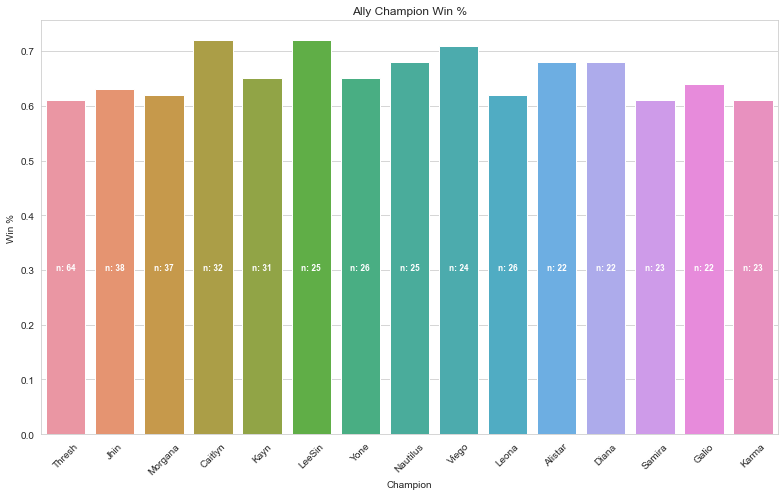

In [20]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (11,7))

ax = sns.barplot(x=df_win_prcnt.index, y= df_win_prcnt['Win %'], data=df_win_prcnt)
ax.set(xlabel='Champion', ylabel='Win %')  
ax.set_title('Ally Champion Win %')


nobs = df_win_prcnt["Games Played"].values
nobs = ["n: " + str(i) for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], 0.3, nobs[tick], horizontalalignment='center', size='small', color='w', weight='semibold')

plt.xticks(rotation=45) 

plt.tight_layout()

In [21]:
#win% against certain enemy champs
#threshold is below 40% wr and 20 or more games played with

win_prcnt_enemyChamps = {}
for champ in dict_loss_champ_counts_sorted_translated.keys():
    if dict_loss_champ_counts_sorted_translated[champ]/dict_enemyChamp_counts_sorted_translated[champ] < .4:
        if dict_enemyChamp_counts_sorted_translated[champ] >= 20:
            win_prcnt_enemyChamps[champ] = "{:.0%}".format(
                                    dict_loss_champ_counts_sorted_translated[champ]/
                                    dict_enemyChamp_counts_sorted_translated[champ]),\
                                    "Games played: {}".format(dict_enemyChamp_counts_sorted_translated[champ])
    else:
        continue

win_prcnt_enemyChamps

{'Yone': ('35%', 'Games played: 34'),
 'Thresh': ('33%', 'Games played: 36'),
 'Khazix': ('38%', 'Games played: 29'),
 'Samira': ('35%', 'Games played: 26'),
 'Sett': ('36%', 'Games played: 25'),
 'Akali': ('39%', 'Games played: 23'),
 'Caitlyn': ('36%', 'Games played: 25'),
 'Sivir': ('35%', 'Games played: 26'),
 'Nautilus': ('33%', 'Games played: 24'),
 'Aatrox': ('38%', 'Games played: 21'),
 'Zed': ('29%', 'Games played: 28'),
 'Vayne': ('29%', 'Games played: 24'),
 'Seraphine': ('26%', 'Games played: 23')}

In [22]:
df_win_prcnt_loss = pd.DataFrame(win_prcnt_enemyChamps).T

df_win_prcnt_loss.columns = ['Win %', 'Games Played']
df_win_prcnt_loss['Games Played'] = df_win_prcnt_loss['Games Played'].str[-2:]
df_win_prcnt_loss['Win %'] = df_win_prcnt_loss['Win %'].str[:-1].astype(int)/100

df_win_prcnt_loss

,Win %,Games Played
Yone,0.35,34
Thresh,0.33,36
Khazix,0.38,29
Samira,0.35,26
Sett,0.36,25
Akali,0.39,23
Caitlyn,0.36,25
Sivir,0.35,26
Nautilus,0.33,24
Aatrox,0.38,21


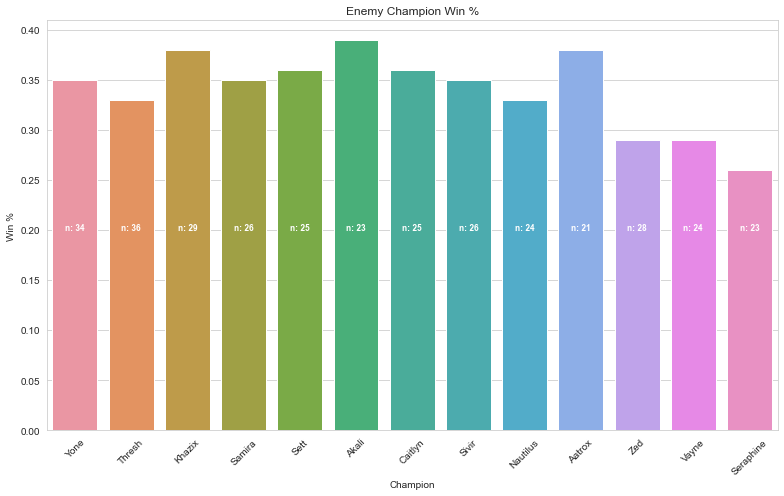

In [23]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (11,7))

ax = sns.barplot(x=df_win_prcnt_loss.index, y= df_win_prcnt_loss['Win %'], data=df_win_prcnt_loss)
ax.set(xlabel='Champion', ylabel='Win %')  
ax.set_title('Enemy Champion Win %')


nobs = df_win_prcnt_loss["Games Played"].values
nobs = ["n: " + str(i) for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], 0.2, nobs[tick], horizontalalignment='center', size='small', color='w', weight='semibold')

plt.xticks(rotation=45) 

plt.tight_layout()

In [24]:
#of wins with certain players

dict_win_ally_counts = {}

for x in range(0,len(df_personal_data[df_personal_data['win'] == True]['allyTeam'].values)):
    for i in range (0,5):
        if df_personal_data[df_personal_data['win'] == True]['allyTeam'].values[x][i] in dict_win_ally_counts:
            dict_win_ally_counts[df_personal_data[df_personal_data['win'] == True]['allyTeam'].values[x][i]] += 1
        else:
            dict_win_ally_counts[df_personal_data[df_personal_data['win'] == True]['allyTeam'].values[x][i]] = 1

dict_win_ally_counts_sorted = {k: v for k, v in sorted(dict_win_ally_counts.items(), key=lambda item: item[1], reverse=True)}
dict_win_ally_counts_sorted

{'dTian': 277,
 'aram on1y': 5,
 'wood jungler': 4,
 'WorstRegionWorld': 3,
 'Tiny Asian Boy': 3,
 'CREAMPIELIBERALS': 3,
 'Itto': 3,
 'Lionel messione': 3,
 'Liquid Therapy ': 2,
 'iQT': 2,
 'DatAsianSmurf': 2,
 'snails on bikes': 2,
 'Abort Lulu Mains': 2,
 'MindfulChimp': 2,
 'Master IV': 2,
 'ISwearSheWsLvl18': 2,
 'Gristlestick': 2,
 'nobaa': 2,
 'JMilkman': 2,
 'Bálsagna': 2,
 'the ëlephant': 2,
 'The Brown Sugar': 2,
 'inchesevan': 2,
 'llIllllIlllllllI': 2,
 'SlushPower': 2,
 'Antâeus': 2,
 'Tutorially': 2,
 'Tequila': 2,
 'Sleep everyday': 2,
 'Hillo': 2,
 'I Did Hit Master': 2,
 'ﬁnd love': 2,
 'ggttlplp016': 2,
 'XiaoZuiMoLeMi': 2,
 'B1eCueWo': 2,
 'MU Senor': 2,
 'Beregond': 2,
 'HA PU': 2,
 'Wangadoodle': 2,
 'Meditation Gap': 2,
 'Aesthiel': 2,
 'ƒull counter': 2,
 'Senpai Neko': 2,
 'TeraBelle': 2,
 'Xerath Onlyfans': 2,
 'LetMePee': 2,
 'xx DLo xx': 2,
 'ROCKER OF WORLDS': 2,
 'pawsubly': 2,
 'Professor Nugg': 2,
 'EyeSeeM': 2,
 'Frodo Baguettes': 2,
 'AstralWarrior69':

In [25]:
#of losses with certain players

dict_loss_ally_counts = {}

for x in range(0,len(df_personal_data[df_personal_data['win'] == False]['allyTeam'].values)):
    for i in range (0,5):
        if df_personal_data[df_personal_data['win'] == False]['allyTeam'].values[x][i] in dict_loss_ally_counts:
            dict_loss_ally_counts[df_personal_data[df_personal_data['win'] == False]['allyTeam'].values[x][i]] += 1
        else:
            dict_loss_ally_counts[df_personal_data[df_personal_data['win'] == False]['allyTeam'].values[x][i]] = 1

            
dict_loss_ally_counts_sorted = {k: v for k, v in sorted(dict_loss_ally_counts.items(), key=lambda item: item[1], reverse=True)}
dict_loss_ally_counts_sorted

{'dTian': 223,
 'aram on1y': 4,
 'Claim': 3,
 'Shower or League': 3,
 'ZoIa': 3,
 'Geranimo': 2,
 'Succulent Burger': 2,
 'Bushido Wolf': 2,
 'Cheekzr': 2,
 'DDOSS': 2,
 'Dîamond Rose': 2,
 'ADcürry': 2,
 'iHopeTheFaquDo': 2,
 'TheTarians': 2,
 'PHOENIX XXX': 2,
 'Spirit Blossom': 2,
 'upper moon two': 2,
 'LoLViirtue': 2,
 'Kizech': 2,
 'LVL 13 Gangplank': 2,
 'pawsubly': 2,
 'Jeƒf': 2,
 'yumichi': 2,
 'Kyree': 2,
 'Akitzu': 2,
 'blacknub3': 2,
 'baby mama': 2,
 '19 17 03 08': 2,
 'Sup im Carrier': 2,
 'HolyCarrot': 2,
 'Kan Davasi': 2,
 '1st Keklel': 2,
 'Reaperˆ': 2,
 'BT Soft Mist': 2,
 'XeoChing': 2,
 'Foolish American': 2,
 'Dare Me': 1,
 'Defstruction': 1,
 'soojin puppy': 1,
 'Triple Ł': 1,
 '0ne 2 3': 1,
 'generating': 1,
 'INLFTRGMH': 1,
 'atmost': 1,
 'LeoEmperor IV': 1,
 'Remmacss': 1,
 'boatsman adrift': 1,
 'wispe': 1,
 'Riot Williams': 1,
 'Kwonz0': 1,
 'ButtahFinger': 1,
 'Liquid Therapy ': 1,
 'MágicStick': 1,
 'JQCBozz': 1,
 'skylly': 1,
 'Hao Shuai': 1,
 'YellowRubbe

In [26]:
#of games with certain players

dict_ally_counts = {}

for x in range(0,len(df_personal_data['allyTeam'].values)):
    for i in range (0,5):
        if df_personal_data['allyTeam'].values[x][i] in dict_ally_counts:
            dict_ally_counts[df_personal_data['allyTeam'].values[x][i]] += 1
        else:
            dict_ally_counts[df_personal_data['allyTeam'].values[x][i]] = 1

dict_ally_counts_sorted = {k: v for k, v in sorted(dict_ally_counts.items(), key=lambda item: item[1], reverse=True)}
dict_ally_counts_sorted

{'dTian': 500,
 'aram on1y': 9,
 'wood jungler': 5,
 'Claim': 4,
 'pawsubly': 4,
 'ZoIa': 4,
 'Liquid Therapy ': 3,
 'Geranimo': 3,
 'Succulent Burger': 3,
 'WorstRegionWorld': 3,
 'Cheekzr': 3,
 'DDOSS': 3,
 'nobaa': 3,
 'Tiny Asian Boy': 3,
 'LoLViirtue': 3,
 'SlushPower': 3,
 'the ëlephant': 3,
 'Antâeus': 3,
 'Shower or League': 3,
 'CREAMPIELIBERALS': 3,
 'Itto': 3,
 'Frodo Baguettes': 3,
 'XiaoZuiMoLeMi': 3,
 'Sup im Carrier': 3,
 'ROCKER OF WORLDS': 3,
 'Professor Nugg': 3,
 'XeoChing': 3,
 'Lionel messione': 3,
 'Dare Me': 2,
 'Triple Ł': 2,
 'MágicStick': 2,
 'AlphaMaleMelvin': 2,
 'skylly': 2,
 'Hao Shuai': 2,
 'iQT': 2,
 'buttsniff6000': 2,
 'DatAsianSmurf': 2,
 'snails on bikes': 2,
 'Abort Lulu Mains': 2,
 'Praxïs': 2,
 'Luuen': 2,
 'TrexKz': 2,
 'MindfulChimp': 2,
 'Master IV': 2,
 'LuciferVVV': 2,
 'Bushido Wolf': 2,
 'ISwearSheWsLvl18': 2,
 'Gristlestick': 2,
 'Sunset Roads ': 2,
 'lce Truck': 2,
 'oranguyang': 2,
 'Heavenly': 2,
 'Dîamond Rose': 2,
 'SHORTY WYD': 2,
 '

In [27]:
#summoners analysis

dict_winners = {}

for name in dict_ally_counts_sorted.keys():
    if dict_ally_counts_sorted[name] >= 3:
        if name in dict_win_ally_counts_sorted.keys():
            try:
                dict_winners[name] = "{:.0%}".format(dict_win_ally_counts_sorted[name]/dict_ally_counts_sorted[name]),\
                'Games played: {}'.format(dict_ally_counts_sorted[name])
            except:
                continue
        else:
            try: 
                dict_winners[name] = "{:.0%}".format(0/dict_ally_counts_sorted[name]),\
                'Games played: {}'.format(dict_ally_counts_sorted[name])
            except:
                continue
    elif dict_ally_counts_sorted[name] == 2:
        if name not in dict_win_ally_counts_sorted:
            try:
                dict_winners[name] = "{:.0%}".format(0),\
                'Games played: {}'.format(dict_ally_counts_sorted[name])
            except:
                continue
    else:
        continue
    
dict_winners

{'dTian': ('55%', 'Games played: 500'),
 'aram on1y': ('56%', 'Games played: 9'),
 'wood jungler': ('80%', 'Games played: 5'),
 'Claim': ('25%', 'Games played: 4'),
 'pawsubly': ('50%', 'Games played: 4'),
 'ZoIa': ('25%', 'Games played: 4'),
 'Liquid Therapy ': ('67%', 'Games played: 3'),
 'Geranimo': ('33%', 'Games played: 3'),
 'Succulent Burger': ('33%', 'Games played: 3'),
 'WorstRegionWorld': ('100%', 'Games played: 3'),
 'Cheekzr': ('33%', 'Games played: 3'),
 'DDOSS': ('33%', 'Games played: 3'),
 'nobaa': ('67%', 'Games played: 3'),
 'Tiny Asian Boy': ('100%', 'Games played: 3'),
 'LoLViirtue': ('33%', 'Games played: 3'),
 'SlushPower': ('67%', 'Games played: 3'),
 'the ëlephant': ('67%', 'Games played: 3'),
 'Antâeus': ('67%', 'Games played: 3'),
 'Shower or League': ('0%', 'Games played: 3'),
 'CREAMPIELIBERALS': ('100%', 'Games played: 3'),
 'Itto': ('100%', 'Games played: 3'),
 'Frodo Baguettes': ('67%', 'Games played: 3'),
 'XiaoZuiMoLeMi': ('67%', 'Games played: 3'),
 'Su

In [28]:
#summoners analysis

dict_winners = {}

for name in dict_ally_counts_sorted.keys():
    if dict_ally_counts_sorted[name] > 1:
        if name in dict_win_ally_counts_sorted.keys():
            continue
        else:
            try: 
                dict_winners[name] = "{:.0%}".format(0/dict_ally_counts_sorted[name]),\
                'Games played: {}'.format(dict_ally_counts_sorted[name])
            except:
                continue
    
dict_winners

{'Shower or League': ('0%', 'Games played: 3'),
 'Bushido Wolf': ('0%', 'Games played: 2'),
 'Dîamond Rose': ('0%', 'Games played: 2'),
 'ADcürry': ('0%', 'Games played: 2'),
 'iHopeTheFaquDo': ('0%', 'Games played: 2'),
 'TheTarians': ('0%', 'Games played: 2'),
 'PHOENIX XXX': ('0%', 'Games played: 2'),
 'Spirit Blossom': ('0%', 'Games played: 2'),
 'upper moon two': ('0%', 'Games played: 2'),
 'Kizech': ('0%', 'Games played: 2'),
 'LVL 13 Gangplank': ('0%', 'Games played: 2'),
 'Jeƒf': ('0%', 'Games played: 2'),
 'yumichi': ('0%', 'Games played: 2'),
 'Kyree': ('0%', 'Games played: 2'),
 'Akitzu': ('0%', 'Games played: 2'),
 'blacknub3': ('0%', 'Games played: 2'),
 'baby mama': ('0%', 'Games played: 2'),
 '19 17 03 08': ('0%', 'Games played: 2'),
 'HolyCarrot': ('0%', 'Games played: 2'),
 'Kan Davasi': ('0%', 'Games played: 2'),
 '1st Keklel': ('0%', 'Games played: 2'),
 'Reaperˆ': ('0%', 'Games played: 2'),
 'BT Soft Mist': ('0%', 'Games played: 2'),
 'Foolish American': ('0%', 'Gam

In [29]:
#null - there is no difference in damage dealt to champions in wins vs losses
#alternative - there is a difference in damage dealt to champions in wins vs losses

df_damage_dealt_win = df_personal_data[df_personal_data['win'] == True]
df_damage_dealt_loss = df_personal_data[df_personal_data['win'] == False]

display(stats.ttest_ind(df_damage_dealt_win.totalDamageDealtToChampions,df_damage_dealt_loss.totalDamageDealtToChampions))

display(df_damage_dealt_win['totalDamageDealtToChampions'].median(), df_damage_dealt_loss['totalDamageDealtToChampions'].median())

#reject null. There is a difference in damage dealt to champions in wins vs losses

Ttest_indResult(statistic=5.120121510206241, pvalue=4.3705144873888915e-07)

16064.0

12683.0

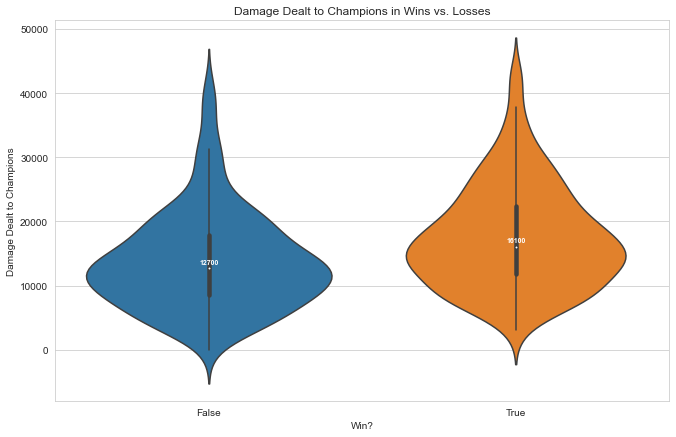

In [30]:
fig, ax = plt.subplots(figsize = (11,7))

ax = sns.violinplot(data = df_personal_data, x='win', y='totalDamageDealtToChampions')

medians = df_personal_data.groupby(['win'])['totalDamageDealtToChampions'].median().values.round(-2).astype(int)
vertical_offset = df_personal_data['totalDamageDealtToChampions'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

ax.set_title('Damage Dealt to Champions in Wins vs. Losses')
ax.set_ylabel('Damage Dealt to Champions')
ax.set_xlabel('Win?');


In [31]:
#null - there is no difference in champion level in wins vs losses
#alternative - there is a difference in champion level in wins vs losses

df_champion_level_win = df_personal_data[df_personal_data['win'] == True]['champLevel']
df_champion_level_loss = df_personal_data[df_personal_data['win'] == False]['champLevel']

display(stats.ttest_ind(df_champion_level_win,df_champion_level_loss))

display(df_champion_level_win.mean(), df_champion_level_loss.mean())

#reject null. There is a difference in champion level in wins vs losses

Ttest_indResult(statistic=6.3673954626687514, pvalue=4.3727727741809933e-10)

15.433212996389893

14.192825112107624

In [32]:
#null - there is no difference in longest time spent living in wins vs losses
#alternative - there is a difference in longest time spent living in wins vs losses

df_longest_time_alive_win = df_personal_data[df_personal_data['win'] == True]['longestTimeSpentLiving']
df_longest_time_alive_loss = df_personal_data[df_personal_data['win'] == False]['longestTimeSpentLiving']

display(stats.ttest_ind(df_longest_time_alive_win,df_longest_time_alive_loss))

display(df_longest_time_alive_win.mean(), df_longest_time_alive_loss.mean())

#seems fishy

Ttest_indResult(statistic=-0.5900074315338079, pvalue=0.5554532725950037)

588.3754512635379

602.8834080717489

In [33]:
#must drop 0s (aka - a perfect game)

df_longest_time_alive_win = df_longest_time_alive_win[df_personal_data[df_personal_data['win'] == True]
                                                      ['longestTimeSpentLiving'] > 0]
df_longest_time_alive_loss = df_longest_time_alive_loss[df_personal_data[df_personal_data['win'] == False]
                                                        ['longestTimeSpentLiving'] > 0]

display(stats.ttest_ind(df_longest_time_alive_win,df_longest_time_alive_loss))

display(df_longest_time_alive_win.mean(), df_longest_time_alive_loss.mean())

#fail to reject null. There is no difference in longest time spent living in wins vs losses
#however, this doesn't account for perfect games

Ttest_indResult(statistic=1.0310511611346878, pvalue=0.3030371418513108)

629.2664092664093

605.5990990990991

In [34]:
#null - there is no difference in vision wards bought in wins vs losses
#alternative - there is a difference in vision wards bought in wins vs losses

df_vision_wards_bought_win = df_personal_data[df_personal_data['win'] == True]['visionWardsBoughtInGame']
df_vision_wards_bought_loss = df_personal_data[df_personal_data['win'] == False]['visionWardsBoughtInGame']

display(stats.ttest_ind(df_vision_wards_bought_win,df_vision_wards_bought_loss))

display(df_vision_wards_bought_win.mean(), df_vision_wards_bought_loss.mean())

#reject null. There is a difference in vision wards bought in wins vs losses

Ttest_indResult(statistic=3.939266266847747, pvalue=9.339907592786017e-05)

2.0108303249097474

1.5605381165919283

In [35]:
#null - there is no difference in game length between wins vs losses
#alternative - there is a difference in game length between wins vs losses

df_game_length_win = df_personal_data[df_personal_data['win'] == True]['gameDuration']
df_game_length_loss = df_personal_data[df_personal_data['win'] == False]['gameDuration']

display(stats.ttest_ind(df_game_length_win,df_game_length_loss))

display(df_game_length_win.median()/60, df_game_length_loss.median()/60)

#fail to reject null. There isn't a difference in game length between wins and losses

Ttest_indResult(statistic=0.5993533804127877, pvalue=0.5492098240098602)

27.516666666666666

27.35

In [36]:
df_personal_data['gameDurationMin'] = df_personal_data['gameDuration']/60

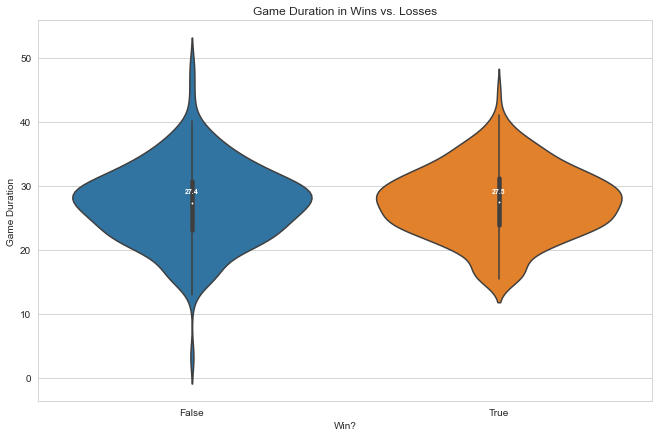

In [37]:
fig, ax = plt.subplots(figsize = (11,7))

ax = sns.violinplot(data = df_personal_data, x='win', y='gameDurationMin')

medians = df_personal_data.groupby(['win'])['gameDurationMin'].median().values.round(1)
vertical_offset = df_personal_data['gameDurationMin'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

ax.set_title('Game Duration in Wins vs. Losses')
ax.set_ylabel('Game Duration')
ax.set_xlabel('Win?');


In [38]:
#null - there is no difference between cs per 10 for wins v losses
#alternative - there is a difference between cs per 10 for wins v losses

df_csMin_win = df_personal_data[df_personal_data['win'] == True]['csPerMin'].dropna()
df_csMin_loss = df_personal_data[df_personal_data['win'] == False]['csPerMin'].dropna()

display(stats.ttest_ind(df_csMin_win,df_csMin_loss))

display(df_csMin_win.median(), df_csMin_loss.median())

Ttest_indResult(statistic=3.007628484987359, pvalue=0.0027660936861331115)

6.855926188786373

6.641045349730976

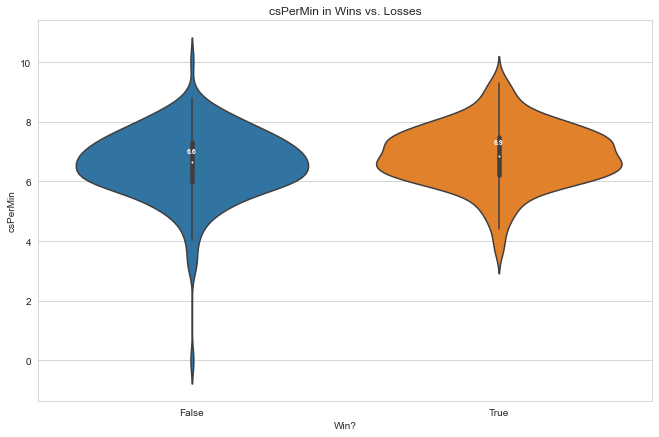

In [39]:
fig, ax = plt.subplots(figsize = (11,7))

ax = sns.violinplot(data = df_personal_data, x='win', y='csPerMin')

medians = df_personal_data.groupby(['win'])['csPerMin'].median().values.round(1)
vertical_offset = df_personal_data['csPerMin'].median() * 0.05 # offset from median for display

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

ax.set_title('csPerMin in Wins vs. Losses')
ax.set_ylabel('csPerMin')
ax.set_xlabel('Win?');

In [40]:
#null - there is no difference between cs per 10 in the first 10 minutes of the game for wins v losses
#alternative - there is a difference between cs per 10 in the first 10 minutes of the game for wins v losses

df_cs10_win_first10 = df_personal_data[df_personal_data['win'] == True]['creepsPerMinDeltas 0-10'].dropna()
df_cs10_loss_first10 = df_personal_data[df_personal_data['win'] == False]['creepsPerMinDeltas 0-10'].dropna()

display(stats.ttest_ind(df_cs10_win_first10,df_cs10_loss_first10))

display(df_cs10_win_first10.mean(), df_cs10_loss_first10.mean())

Ttest_indResult(statistic=1.1524503547203553, pvalue=0.24969007079976782)

6.39927797833935

6.2792792792792795

In [41]:
#null - there is no difference between cs per 10 in the second 10 minutes of the game for wins v losses
#alternative - there is a difference between cs per 10 in the second 10 minutes of the game for wins v losses

df_cs10_win_second10 = df_personal_data[df_personal_data['win'] == True]['creepsPerMinDeltas 10-20'].dropna()
df_cs10_loss_second10 = df_personal_data[df_personal_data['win'] == False]['creepsPerMinDeltas 10-20'].dropna()

display(stats.ttest_ind(df_cs10_win_second10,df_cs10_loss_second10))

display(df_cs10_win_second10.mean(), df_cs10_loss_second10.mean())

Ttest_indResult(statistic=3.2049997171409714, pvalue=0.0014458475015367979)

7.709375

7.2965

In [42]:
#null - there is no difference between cs per 10 in the third 10 minutes of the game for wins v losses
#alternative - there is a difference between cs per 10 in the third 10 minutes of the game for wins v losses

df_cs10_win_third10 = df_personal_data[df_personal_data['win'] == True]['creepsPerMinDeltas 20-30'].dropna()
df_cs10_loss_third10 = df_personal_data[df_personal_data['win'] == False]['creepsPerMinDeltas 20-30'].dropna()

display(stats.ttest_ind(df_cs10_win_third10,df_cs10_loss_third10))

display(df_cs10_win_third10.mean(), df_cs10_loss_third10.mean())

Ttest_indResult(statistic=-1.4237680653041713, pvalue=0.156590438834021)

6.103488372093023

6.542424242424242

In [43]:
#null - there is no difference between damage taken during the first 10 minutes of the game for wins v losses
#alternative - there is a difference between damage taken during the first 10 minutes of the game for wins v losses

df_damage_taken_first10_win = df_personal_data[df_personal_data['win'] == True]['damageTakenPerMinDeltas 0-10'].dropna()
df_damage_taken_first10_loss = df_personal_data[df_personal_data['win'] == False]['damageTakenPerMinDeltas 0-10'].dropna()

display(stats.ttest_ind(df_damage_taken_first10_win,df_damage_taken_first10_loss))

display(df_damage_taken_first10_win.mean(), df_damage_taken_first10_loss.mean())

Ttest_indResult(statistic=-0.872942925751185, pvalue=0.38311574095254397)

368.80722021660654

378.45405405405404

In [44]:
#null - there is no difference between damage taken during the second 10 minutes of the game for wins v losses
#alternative - there is a difference between damage taken during the second 10 minutes of the game for wins v losses

df_damage_taken_second10_win = df_personal_data[df_personal_data['win'] == True]['damageTakenPerMinDeltas 10-20'].dropna()
df_damage_taken_second10_loss = df_personal_data[df_personal_data['win'] == False]['damageTakenPerMinDeltas 10-20'].dropna()

display(stats.ttest_ind(df_damage_taken_second10_win,df_damage_taken_second10_loss))

display(df_damage_taken_second10_win.mean(), df_damage_taken_second10_loss.mean())

Ttest_indResult(statistic=-3.393415505824369, pvalue=0.0007507658857284712)

639.9875

695.8355

In [45]:
#null - there is no difference between damage taken during the third 10 minutes of the game for wins v losses
#alternative - there is a difference between damage taken during the third 10 minutes of the game for wins v losses

df_damage_taken_third10_win = df_personal_data[df_personal_data['win'] == True]['damageTakenPerMinDeltas 20-30'].dropna()
df_damage_taken_third10_loss = df_personal_data[df_personal_data['win'] == False]['damageTakenPerMinDeltas 20-30'].dropna()

display(stats.ttest_ind(df_damage_taken_third10_win,df_damage_taken_third10_loss))

display(df_damage_taken_third10_win.mean(), df_damage_taken_third10_loss.mean())

Ttest_indResult(statistic=-2.0308187582526256, pvalue=0.04403974876252434)

836.1930232558142

925.5621212121213

In [46]:
display(blue_games, red_games)
display(blue_games_won, red_games_won)

NameError: name 'blue_games' is not defined

In [47]:
#100 = blue
#200 = red

total_games = len(df_personal_data)
actual_win_perc = len(df_personal_data[df_personal_data['win'] == True])/total_games

blue_games = len(df_personal_data[df_personal_data['teamColor'] == 100])
red_games = len(df_personal_data[df_personal_data['teamColor'] == 200])

blue_games_won = len(df_personal_data[(df_personal_data['teamColor'] == 100) & 
                                  (df_personal_data['win'] == True)]['champion'])
red_games_won = len(df_personal_data[(df_personal_data['teamColor'] == 200) & 
                                  (df_personal_data['win'] == True)]['champion'])

display("Red side win %: {:.0%}".format(red_games_won/red_games))
display("Blue side win %: {:.0%}".format(blue_games_won/blue_games))

expected = [red_games*actual_win_perc, blue_games*actual_win_perc]
observed = [red_games_won, blue_games_won]

# display(expected, observed)

#it looks like i'm stronger on the red side than blue side. but is this by random chance, since we're just looking at a 
#500 game sample? There's some probability of getting this result, even if the null hypothesis is true.

#null - equal win % between red and blue side
#alternative - not equal win % between red and blue side

stats.chisquare(f_obs=observed, f_exp=expected)

#accept null: I have an equal win % between red and blue

'Red side win %: 56%'

'Blue side win %: 55%'

Power_divergenceResult(statistic=0.013329630658150354, pvalue=0.908085263676355)

# Logistic Regression

In order to evaluate our model, let's create a class to help organize our model and cross validation.

In [48]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=5):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 5)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

Before diving into a logistic regression, let's finalize the data we want to analyze.

In [49]:
#reminder of our dataframe
df_personal_data

,champion,gameDuration,win,totalDamageDealtToChampions,goldEarned,champLevel,totalMinionsKilled,longestTimeSpentLiving,teamColor,visionWardsBoughtInGame,...,damageTakenPerMinDeltas 10-20,damageTakenPerMinDeltas 20-30,creepsPerMinDeltas 10-20,creepsPerMinDeltas 20-30,allyTeam,allyChamps,enemyTeam,enemyChamps,csPerMin,gameDurationMin
0,10,1310,False,11918,6719,13,149,386,200,2,...,753.1,NaN,7.4,NaN,"[Dare Me, Defstruction, soojin puppy, dTian, T...","[102, 68, 43, 10, 67]","[Kirihime, Addle, fidlekastro, mypphard, TheOn...","[111, 103, 9, 62, 145]",6.824427,21.833333
1,10,1220,False,7379,6742,13,173,535,200,1,...,1013.1,NaN,9.7,NaN,"[0ne 2 3, generating, INLFTRGMH, dTian, atmost]","[77, 18, 40, 10, 39]","[InsaneJinx, mute all be safe, BELLAKO, Kind Y...","[360, 777, 62, 35, 875]",8.508197,20.333333
2,10,1168,False,4582,5783,11,119,354,200,2,...,NaN,NaN,NaN,NaN,"[LeoEmperor IV, Remmacss, boatsman adrift, wis...","[39, 523, 76, 497, 10]","[GianLTC, hashinshin, EREN JAÉGER, RebelGangg,...","[53, 266, 84, 245, 429]",6.113014,19.466667
3,10,1767,False,10487,12658,15,178,636,100,2,...,433.2,NaN,6.4,NaN,"[Riot Williams, Kwonz0, ButtahFinger, dTian, L...","[516, 222, 201, 10, 30]","[Geranimo, Nami is a man, 1st Keklel, madbrizk...","[18, 235, 254, 24, 517]",6.044143,29.450000
4,10,1446,False,13138,8604,14,173,432,200,2,...,798.1,NaN,8.6,NaN,"[Geranimo, Succulent Burger, dTian, MágicStick...","[235, 121, 10, 69, 64]","[it takes time, DurandalNA, generating, Challe...","[12, 245, 18, 107, 62]",7.178423,24.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10,1994,True,25960,14632,18,182,613,200,3,...,535.3,1090.5,7.2,3.5,"[Sibon, IntAcc17, bearlion123, dTian, wood jun...","[91, 145, 20, 10, 412]","[Riseaboveoverc, Vanguard717, zombie12thfan, N...","[240, 111, 141, 29, 38]",5.476429,33.233333
496,10,1930,True,26208,16934,18,254,574,200,5,...,333.2,484.6,8.9,9.0,"[Extra Virgin Oil, Muzzik, dTian, wood jungler...","[19, 202, 10, 432, 69]","[ItsJcho, ZipSeamD0tCom, let us get it, amaiz,...","[98, 102, 13, 63, 222]",7.896373,32.166667
497,10,2248,True,29544,14625,18,208,584,200,2,...,515.6,967.6,7.6,4.9,"[dTian, wood jungler, DaysukeChannn69, Sausage...","[10, 432, 236, 81, 72]","[Riding Hecarim, Ri Bokku, warm sunset, the to...","[120, 223, 4, 114, 235]",5.551601,37.466667
498,10,1673,True,14018,12724,16,161,534,200,3,...,834.9,NaN,4.9,NaN,"[Shumonnn, dTian, wood jungler, riparial, puss...","[245, 10, 432, 141, 67]","[Madly, dubl123, ItsDonJuan, littlemouse3, Doo...","[57, 81, 234, 101, 421]",5.774059,27.883333


In [50]:
#preview dataframe for nulls/NAs
df_personal_data.isna().sum()

champion                           0
gameDuration                       0
win                                0
totalDamageDealtToChampions        0
goldEarned                         0
champLevel                         0
totalMinionsKilled                 0
longestTimeSpentLiving             0
teamColor                          0
visionWardsBoughtInGame            0
firstBloodKill                     1
firstBloodAssist                   1
damageTakenPerMinDeltas 0-10       1
creepsPerMinDeltas 0-10            1
damageTakenPerMinDeltas 10-20     44
damageTakenPerMinDeltas 20-30    348
creepsPerMinDeltas 10-20          44
creepsPerMinDeltas 20-30         348
allyTeam                           0
allyChamps                         0
enemyTeam                          0
enemyChamps                        0
csPerMin                           0
gameDurationMin                    0
dtype: int64

In [51]:
#variables of interest
variables_for_log_reg = ['gameDuration', 'totalDamageDealtToChampions', 'goldEarned', 'champLevel', 'longestTimeSpentLiving', 
               'teamColor', 'visionWardsBoughtInGame', 'firstBloodKill', 'csPerMin', 'win']
df_log_reg = df_personal_data[variables_for_log_reg]

#remove NAs from firstBloodKill - only 1 record, so fine dropping
df_log_reg = df_log_reg.dropna()
df_log_reg

,gameDuration,totalDamageDealtToChampions,goldEarned,champLevel,longestTimeSpentLiving,teamColor,visionWardsBoughtInGame,firstBloodKill,csPerMin,win
0,1310,11918,6719,13,386,200,2,False,6.824427,False
1,1220,7379,6742,13,535,200,1,False,8.508197,False
2,1168,4582,5783,11,354,200,2,False,6.113014,False
3,1767,10487,12658,15,636,100,2,False,6.044143,False
4,1446,13138,8604,14,432,200,2,False,7.178423,False
...,...,...,...,...,...,...,...,...,...,...
495,1994,25960,14632,18,613,200,3,False,5.476429,True
496,1930,26208,16934,18,574,200,5,False,7.896373,True
497,2248,29544,14625,18,584,200,2,False,5.551601,True
498,1673,14018,12724,16,534,200,3,False,5.774059,True


In [52]:
# Convert True/False, 100/200
df_log_reg['firstBloodKill'] = np.where(df_log_reg['firstBloodKill'] == True, 1, 0)
df_log_reg['teamColor_isBlue'] = np.where(df_log_reg['teamColor'] == 100, 1, 0)

#final dataframe for regression
df_log_reg

,gameDuration,totalDamageDealtToChampions,goldEarned,champLevel,longestTimeSpentLiving,teamColor,visionWardsBoughtInGame,firstBloodKill,csPerMin,win,teamColor_isBlue
0,1310,11918,6719,13,386,200,2,0,6.824427,False,0
1,1220,7379,6742,13,535,200,1,0,8.508197,False,0
2,1168,4582,5783,11,354,200,2,0,6.113014,False,0
3,1767,10487,12658,15,636,100,2,0,6.044143,False,1
4,1446,13138,8604,14,432,200,2,0,7.178423,False,0
...,...,...,...,...,...,...,...,...,...,...,...
495,1994,25960,14632,18,613,200,3,0,5.476429,True,0
496,1930,26208,16934,18,574,200,5,0,7.896373,True,0
497,2248,29544,14625,18,584,200,2,0,5.551601,True,0
498,1673,14018,12724,16,534,200,3,0,5.774059,True,0


In [53]:
x_variables = ['gameDuration', 'totalDamageDealtToChampions', 'goldEarned', 'champLevel', 'longestTimeSpentLiving', 
               'teamColor_isBlue', 'visionWardsBoughtInGame', 'firstBloodKill', 'csPerMin']

X = df_log_reg[x_variables]
y = df_log_reg['win']

### Model 1 - Baseline

Our baseline model will be a model which will always choose the majority class (a win).

In [54]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

baseline_model = DummyClassifier(strategy="most_frequent")

baseline_model.fit(X_train, y_train)

baseline_model.predict(X_train)

cv_results = cross_val_score(baseline_model, X_train, y_train, cv=5)
cv_results

array([0.54666667, 0.54666667, 0.54666667, 0.54666667, 0.55405405])

In [55]:
baseline_model_results = ModelWithCV(
                        model=baseline_model,
                        model_name='Baseline',
                        X=X_train, 
                        y=y_train
)

CV Results for `Baseline` model:
            0.54814 ± 0.00295 accuracy
        


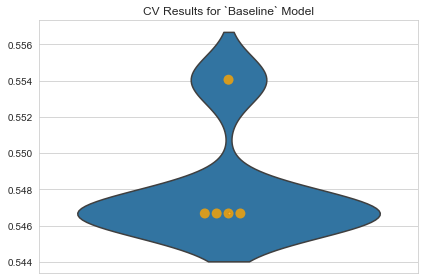

In [56]:
fig, ax = plt.subplots()

ax = baseline_model_results.plot_cv(ax)
plt.tight_layout();

baseline_model_results.print_cv_summary()

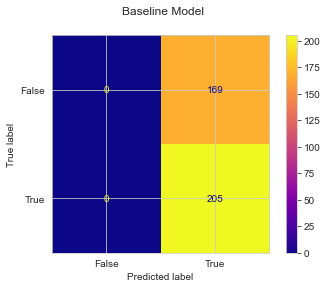

In [57]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()

fig.suptitle("Baseline Model")

plot_confusion_matrix(baseline_model, X_train, y_train, ax=ax, cmap="plasma");

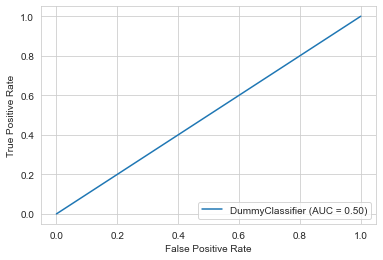

In [58]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(baseline_model,X_train,y_train)

OK - a pretty bad model, as expected. We'd hope that future iterations will improve, with the ROC curve shifting up and predictions being higher than 55.6%.

### Model 2

Let's normalize our data.

In [59]:
from sklearn.preprocessing import normalize
X_norm = normalize(X)
X_norm

array([[9.52761288e-02, 8.66794582e-01, 4.88671992e-01, ...,
        1.45459739e-04, 0.00000000e+00, 4.96339719e-04],
       [1.20988486e-01, 7.31782000e-01, 6.68610143e-01, ...,
        9.91708903e-05, 0.00000000e+00, 8.43765444e-04],
       [1.56181676e-01, 6.12692158e-01, 7.73286502e-01, ...,
        2.67434377e-04, 0.00000000e+00, 8.17415006e-04],
       ...,
       [6.80234174e-02, 8.93987475e-01, 4.42545587e-01, ...,
        6.05190546e-05, 0.00000000e+00, 1.67988835e-04],
       [8.79930695e-02, 7.37290406e-01, 6.69231212e-01, ...,
        1.57787931e-04, 0.00000000e+00, 3.03692252e-04],
       [1.39168060e-01, 7.10445220e-01, 6.88959132e-01, ...,
        0.00000000e+00, 0.00000000e+00, 7.82224367e-04]])

In [60]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=77)

#no regularization for now
my_model = LogisticRegression(random_state = 77, penalty='none', max_iter=1000)

my_model.fit(X_train, y_train)
my_model.predict(X_train)

my_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none', random_state=77)

In [61]:
my_model_results = ModelWithCV(
                        model=my_model,
                        model_name='Model 2',
                        X=X_train, 
                        y=y_train
)

CV Results for `Model 2` model:
            0.82346 ± 0.03655 accuracy
        


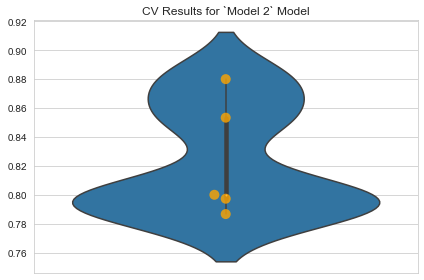

In [62]:
# Saving variable for convenience
model_results = my_model_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

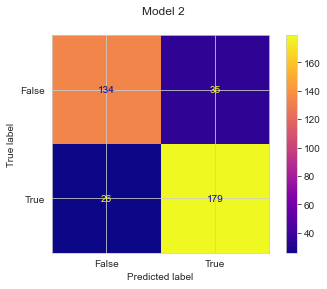

In [63]:
fig, ax = plt.subplots()

fig.suptitle("Model 2")

plot_confusion_matrix(my_model, X_train, y_train, ax=ax, cmap="plasma");

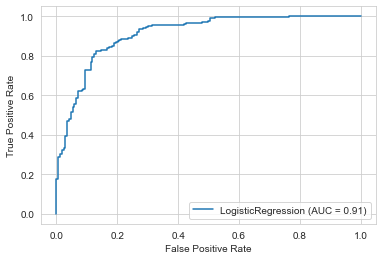

In [64]:
plot_roc_curve(my_model,X_train,y_train)

81% accuracy - a strong improvement.

In [65]:
# Let's get predictions for training & testing sets
y_hat_train = my_model.predict(X_train)
y_hat_test = my_model.predict(X_test)


# Was our model correct?
residuals = y_train == y_hat_train

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Number of values correctly predicted:
True     313
False     61
Name: win, dtype: int64

 ------------------------------ 

Percentage of values correctly predicted: 
True     0.836898
False    0.163102
Name: win, dtype: float64


In [66]:
#test set
residuals = y_test == y_hat_test

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Number of values correctly predicted:
True     104
False     21
Name: win, dtype: int64

 ------------------------------ 

Percentage of values correctly predicted: 
True     0.832
False    0.168
Name: win, dtype: float64


### Model 3

But could it be better? Let's try some poly features.

In [67]:
X
X_norm_df = pd.DataFrame(X_norm, columns = ['gameDuration', 'totalDamageDealtToChampions', 'goldEarned', 'champLevel', 'longestTimeSpentLiving', 'teamColor_isBlue', 'visionWardsBoughtInGame', 'firstBloodKill', 'csPerMin'])
X_norm_df

,gameDuration,totalDamageDealtToChampions,goldEarned,champLevel,longestTimeSpentLiving,teamColor_isBlue,visionWardsBoughtInGame,firstBloodKill,csPerMin
0,0.095276,0.866795,0.488672,0.000945,0.028074,0.00000,0.000145,0.0,0.000496
1,0.120988,0.731782,0.668610,0.001289,0.053056,0.00000,0.000099,0.0,0.000844
2,0.156182,0.612692,0.773287,0.001471,0.047336,0.00000,0.000267,0.0,0.000817
3,0.106801,0.633856,0.765076,0.000907,0.038441,0.00006,0.000121,0.0,0.000365
4,0.091652,0.832731,0.545351,0.000887,0.027382,0.00000,0.000127,0.0,0.000455
...,...,...,...,...,...,...,...,...,...
494,0.066750,0.869025,0.489814,0.000603,0.020521,0.00000,0.000100,0.0,0.000183
495,0.061725,0.838179,0.541580,0.000576,0.018358,0.00000,0.000160,0.0,0.000253
496,0.068023,0.893987,0.442546,0.000545,0.017672,0.00000,0.000061,0.0,0.000168
497,0.087993,0.737290,0.669231,0.000842,0.028086,0.00000,0.000158,0.0,0.000304


In [68]:
from sklearn.preprocessing import PolynomialFeatures

x_variables = ['gameDuration', 'totalDamageDealtToChampions', 'goldEarned', 'champLevel', 'longestTimeSpentLiving', 
               'teamColor_isBlue', 'visionWardsBoughtInGame', 'firstBloodKill', 'csPerMin']

X = df_log_reg[x_variables]
y = df_log_reg['win']

X_train, X_test, y_train, y_test = train_test_split(X_norm_df, y, random_state=0)

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly_train = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names(X_train.columns))
X_poly_test = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names(X_test.columns))
X_poly = pd.concat([X_poly_train, X_poly_test])
X_poly

,gameDuration,totalDamageDealtToChampions,goldEarned,champLevel,longestTimeSpentLiving,teamColor_isBlue,visionWardsBoughtInGame,firstBloodKill,csPerMin,gameDuration^2,...,teamColor_isBlue^2,teamColor_isBlue visionWardsBoughtInGame,teamColor_isBlue firstBloodKill,teamColor_isBlue csPerMin,visionWardsBoughtInGame^2,visionWardsBoughtInGame firstBloodKill,visionWardsBoughtInGame csPerMin,firstBloodKill^2,firstBloodKill csPerMin,csPerMin^2
0,0.059906,0.871272,0.487001,0.000537,0.011209,0.000000,0.000101,0.0,0.000180,0.003589,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.013695e-08,0.0,1.817269e-08,0.0,0.0,3.257849e-08
1,0.069014,0.851313,0.517856,0.000710,0.048251,0.000042,0.000042,0.0,0.000311,0.004763,...,1.745240e-09,1.745240e-09,0.0,1.299422e-08,1.745240e-09,0.0,1.299422e-08,0.0,0.0,9.674872e-08
2,0.080182,0.740316,0.667459,0.000966,0.000000,0.000081,0.000161,0.0,0.000582,0.006429,...,6.480910e-09,1.296182e-08,0.0,4.684995e-08,2.592364e-08,0.0,9.369991e-08,0.0,0.0,3.386744e-07
3,0.087432,0.813517,0.574464,0.000785,0.023145,0.000000,0.000098,0.0,0.000398,0.007644,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,9.618355e-09,0.0,3.900208e-08,0.0,0.0,1.581520e-07
4,0.078700,0.827886,0.553860,0.000767,0.040611,0.000000,0.000110,0.0,0.000369,0.006194,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.201440e-08,0.0,4.041054e-08,0.0,0.0,1.359213e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.106193,0.638723,0.760941,0.001068,0.041523,0.000000,0.000214,0.0,0.000522,0.011277,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,4.565373e-08,0.0,1.114551e-07,0.0,0.0,2.720970e-07
121,0.092525,0.733109,0.672301,0.000919,0.044719,0.000066,0.000066,0.0,0.000442,0.008561,...,4.312188e-09,4.312188e-09,0.0,2.901316e-08,4.312188e-09,0.0,2.901316e-08,0.0,0.0,1.952057e-07
122,0.101528,0.782413,0.613864,0.000880,0.026292,0.000000,0.000117,0.0,0.000271,0.010308,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.377659e-08,0.0,3.177375e-08,0.0,0.0,7.328165e-08
123,0.094161,0.777758,0.619760,0.000846,0.046072,0.000065,0.000130,0.0,0.000440,0.008866,...,4.234558e-09,8.469115e-09,0.0,2.862058e-08,1.693823e-08,0.0,5.724115e-08,0.0,0.0,1.934411e-07


In [69]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, random_state=0)

my_model_poly = LogisticRegression(max_iter=10000, penalty='none')
my_model_poly.fit(X_poly_train, y_poly_train)

LogisticRegression(max_iter=10000, penalty='none')

In [70]:
my_model_results = ModelWithCV(
                        model=my_model_poly,
                        model_name='Model 3 - Poly',
                        X=X_train, 
                        y=y_train
)

CV Results for `Model 3 - Poly` model:
            0.77013 ± 0.03953 accuracy
        


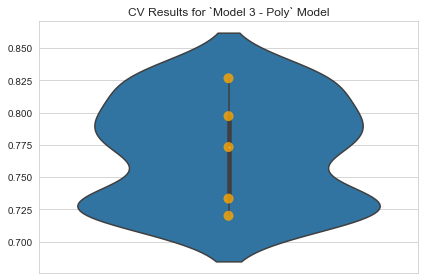

In [71]:
# Saving variable for convenience
model_results = my_model_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

Minimal improvement...

### Model 4

Let's see different regularization penalties.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)
C_values = [0.0001,0.001,0.01,0.1,1]

for c in C_values:
    my_model_reg = LogisticRegression(random_state = 77, C=c, max_iter=1000)

    my_model_reg.fit(X_train, y_train)
    my_model_reg.predict(X_train)

    my_model_reg.fit(X_train, y_train)
    
    my_model_reg_results = ModelWithCV(
                        model=my_model_reg,
                        model_name=f'Model 4 - Reg C={c:e}',
                        X=X_train, 
                        y=y_train
)
    # Saving variable for convenience
    model_results = my_model_reg_results

    # Print CV results
    model_results.print_cv_summary()


CV Results for `Model 4 - Reg C=1.000000e-04` model:
            0.76728 ± 0.04795 accuracy
        
CV Results for `Model 4 - Reg C=1.000000e-03` model:
            0.77265 ± 0.04884 accuracy
        
CV Results for `Model 4 - Reg C=1.000000e-02` model:
            0.76995 ± 0.05211 accuracy
        
CV Results for `Model 4 - Reg C=1.000000e-01` model:
            0.79957 ± 0.05499 accuracy
        
CV Results for `Model 4 - Reg C=1.000000e+00` model:
            0.79957 ± 0.05690 accuracy
        


In [73]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

my_model_reg = LogisticRegression(random_state = 77, C=.1, max_iter=1000)

my_model_reg.fit(X_train, y_train)
my_model_reg.predict(X_train)

my_model_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=77)

In [74]:
my_model_results = ModelWithCV(
                        model=my_model_reg,
                        model_name='Model 4 - Reg C=.1',
                        X=X_train, 
                        y=y_train
)

CV Results for `Model 4 - Reg C=.1` model:
            0.79957 ± 0.05499 accuracy
        


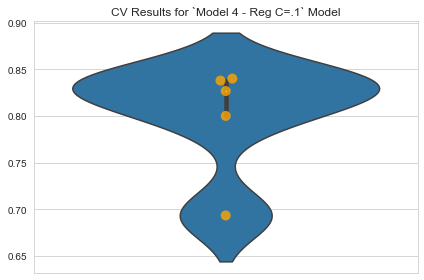

In [75]:
# Saving variable for convenience
model_results = my_model_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [76]:
sorted(list(zip(X_train.columns, my_model_reg.coef_[0])),
       key=lambda x: abs(x[1]), reverse=True)

[('champLevel', 0.9536011700457023),
 ('csPerMin', -0.6031569652288911),
 ('visionWardsBoughtInGame', 0.36984787991381224),
 ('teamColor_isBlue', -0.042678432008319514),
 ('firstBloodKill', 0.02616982193365395),
 ('gameDuration', -0.01106369447715638),
 ('longestTimeSpentLiving', -0.0014430494956868597),
 ('goldEarned', 0.0009391951099888259),
 ('totalDamageDealtToChampions', -0.00012329015909769167)]

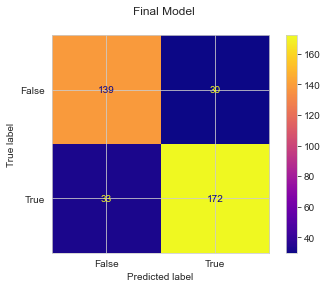

In [77]:
fig, ax = plt.subplots()

fig.suptitle("Final Model")

plot_confusion_matrix(my_model_reg, X_train, y_train, ax=ax, cmap="plasma");

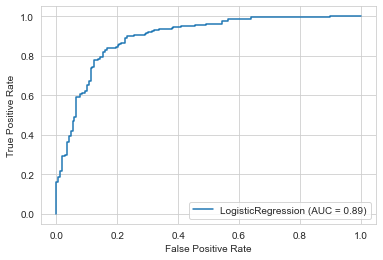

In [78]:
plot_roc_curve(my_model_reg,X_train,y_train)

In [79]:
# Let's get predictions for training & testing sets
y_hat_train = my_model_reg.predict(X_train)
y_hat_test = my_model_reg.predict(X_test)


# Was our model correct?
residuals = y_train == y_hat_train

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Number of values correctly predicted:
True     311
False     63
Name: win, dtype: int64

 ------------------------------ 

Percentage of values correctly predicted: 
True     0.831551
False    0.168449
Name: win, dtype: float64


In [80]:
#test set
residuals = y_test == y_hat_test

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

print('\n','-'*30,'\n')

print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Number of values correctly predicted:
True     99
False    26
Name: win, dtype: int64

 ------------------------------ 

Percentage of values correctly predicted: 
True     0.792
False    0.208
Name: win, dtype: float64


### Decision Tree Method

In [81]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29, test_size=.2)

In [82]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=29) 

tree_clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=29)

In [83]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.73

# PCA

In [97]:
X_test

,gameDuration,totalDamageDealtToChampions,goldEarned,champLevel,longestTimeSpentLiving,teamColor_isBlue,visionWardsBoughtInGame,firstBloodKill,csPerMin
165,1361,9293,7975,13,843,0,1,0,8.288024
272,1319,4525,6580,13,961,0,0,0,7.642153
191,1618,12898,10374,15,762,1,1,0,6.489493
405,996,9196,8291,12,0,1,2,0,7.228916
29,1497,7074,8998,14,478,1,1,0,7.735471
...,...,...,...,...,...,...,...,...,...
166,1355,3747,6043,11,543,0,0,0,5.889299
141,1406,6771,8011,13,319,0,1,0,6.699858
28,1687,14201,10985,15,781,1,2,0,6.793124
38,1629,13255,11974,16,647,0,2,0,7.918969


In [96]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [98]:
from sklearn.decomposition import PCA


for i in range(1,10):
    pca = PCA(n_components=i)
    
    X_train_scaled_pce = pce.fit_transform(X_train_scaled)
    
    lr_pca = LogisticRegression()
    lr_pca.fit(X_train_scaled_pce, y_train)
    print('n =', i, lr_pca.score(X_train_scaled_pce, y_train))

NameError: name 'pce' is not defined